In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# importing shampoo data set
data = os.chdir(r"C:\Users\CC\Downloads")
data = pd.read_csv('shampoo (1).txt')
data['Year'] = data['Month'].apply(lambda x: int(x.split('-')[0]) + 2000)
data['Month'] = data['Month'].apply(lambda x: int(x.split('-')[1]))
data['Date'] = data.apply(lambda x: pd.Timestamp(year=int(x['Year']), month=int(x['Month']), day=1), axis=1)
data.set_index('Date', inplace=True)
data.drop(['Year', 'Month'], axis=1, inplace=True)
data['Sales'] = data['Sales'].astype(float)

In [4]:
data

,Sales
Date,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2001-01-01 to 2003-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [6]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


# 1. Apply various frequencies to resample the given time series data

In [7]:
# Resample the data at various frequencies
data_daily = data.resample('D').sum()
data_weekly = data.resample('W').sum()
data_monthly = data.resample('M').sum()
data_quarterly = data.resample('Q').sum()
data_annually = data.resample('Y').sum()

# 2. Calculate moving average with appropriate rolling window to analyze the data


In [8]:
# Calculate moving average with an appropriate rolling window
window = 3  # You can adjust the window size as per your requirement
moving_average = data['Sales'].rolling(window=window).mean()

In [9]:
# Print the resampled data
print("Daily Resampled Data:")
print(data_daily.head())
print()
print("Weekly Resampled Data:")
print(data_weekly.head())
print()
print("Monthly Resampled Data:")
print(data_monthly.head())
print()
print("Quarterly Resampled Data:")
print(data_quarterly.head())
print()
print("Yearly Resampled Data:")
print(data_annually.head())
print()

Daily Resampled Data:
            Sales
Date             
2001-01-01  266.0
2001-01-02    0.0
2001-01-03    0.0
2001-01-04    0.0
2001-01-05    0.0

Weekly Resampled Data:
            Sales
Date             
2001-01-07  266.0
2001-01-14    0.0
2001-01-21    0.0
2001-01-28    0.0
2001-02-04  145.9

Monthly Resampled Data:
            Sales
Date             
2001-01-31  266.0
2001-02-28  145.9
2001-03-31  183.1
2001-04-30  119.3
2001-05-31  180.3

Quarterly Resampled Data:
            Sales
Date             
2001-03-31  595.0
2001-06-30  468.1
2001-09-30  649.1
2001-12-31  645.3
2002-03-31  553.9

Yearly Resampled Data:
             Sales
Date              
2001-12-31  2357.5
2002-12-31  3153.5
2003-12-31  5742.6



In [10]:
# Print the moving averages
print("Moving Averages:")
print(moving_average)


Moving Averages:
Date
2001-01-01           NaN
2001-02-01           NaN
2001-03-01    198.333333
2001-04-01    149.433333
2001-05-01    160.900000
2001-06-01    156.033333
2001-07-01    193.533333
2001-08-01    208.266667
2001-09-01    216.366667
2001-10-01    180.066667
2001-11-01    217.400000
2001-12-01    215.100000
2002-01-01    238.900000
2002-02-01    176.566667
2002-03-01    184.633333
2002-04-01    210.966667
2002-05-01    224.933333
2002-06-01    250.566667
2002-07-01    234.800000
2002-08-01    272.200000
2002-09-01    273.166667
2002-10-01    338.366667
2002-11-01    325.333333
2002-12-01    342.800000
2003-01-01    315.500000
2003-02-01    374.133333
2003-03-01    365.333333
2003-04-01    398.533333
2003-05-01    385.500000
2003-06-01    426.000000
2003-07-01    471.400000
2003-08-01    473.500000
2003-09-01    555.033333
2003-10-01    521.633333
2003-11-01    579.533333
2003-12-01    567.833333
Name: Sales, dtype: float64


# 3. Plot the given time series data to observe the trend and seasonality of the signal

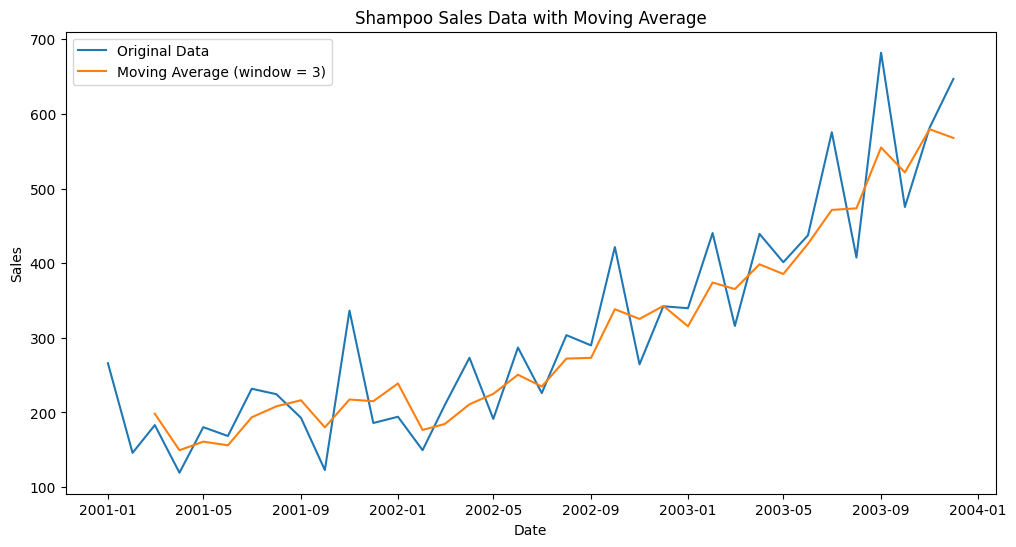

In [11]:
# Plot the original data and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Original Data')
plt.plot(data.index, moving_average, label='Moving Average (window = {})'.format(window))
plt.title('Shampoo Sales Data with Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

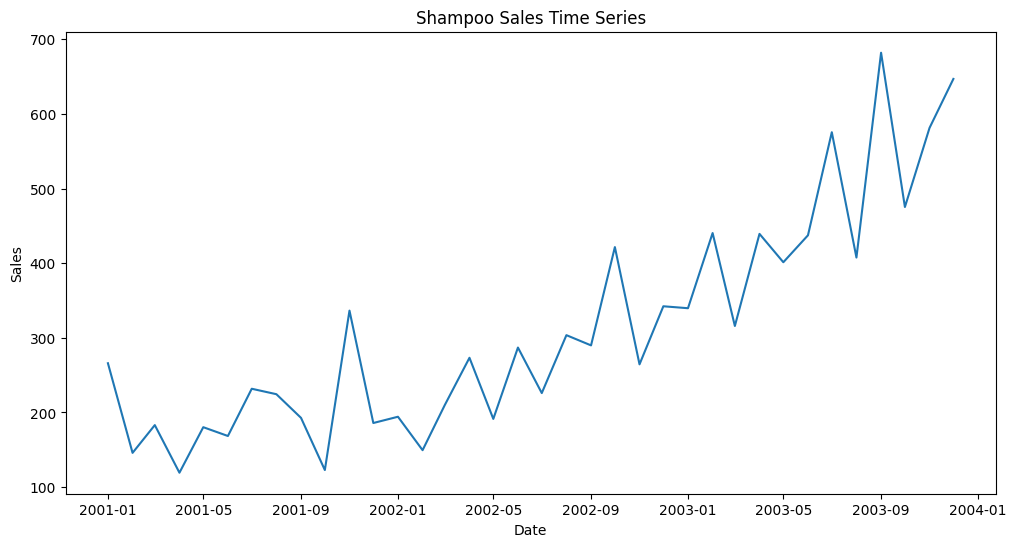

In [12]:
# Step 2: Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'])
plt.title('Shampoo Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

TREND: The moving average line shows a consistent upward slope, it suggests a positive trend in sales over time
        
SEASONALITY: Seasonality refers to recurring patterns or fluctuations that occur at regular intervals, such as monthly, quarterly, or yearly. By examining the deviations of the original data from the moving average line, we can identify seasonal patterns. 

# 4. Decompose the sales time series data into multiple components

In [13]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Sales'], period=12)  # Assuming a period of 12 months


In [14]:
# Extract the trend, seasonality, and residual components
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid


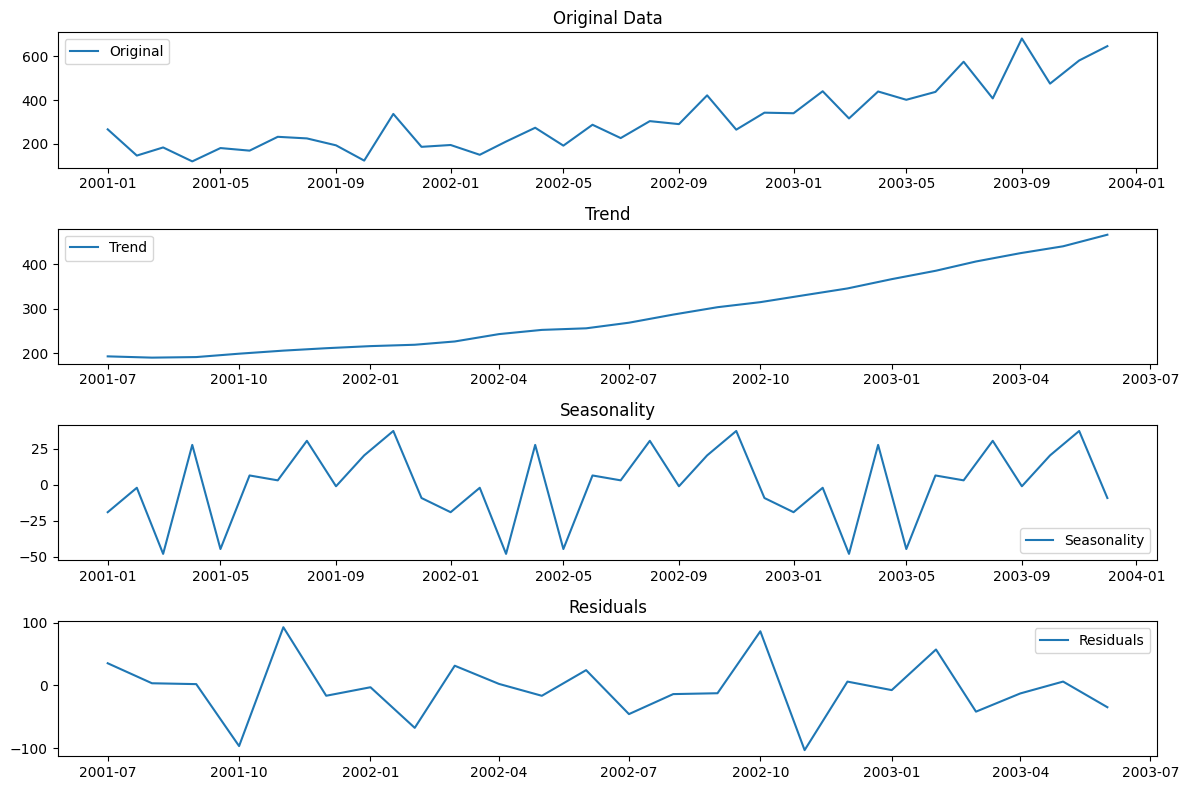

In [17]:
# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['Sales'], label='Original')
plt.legend(loc='best')
plt.title('Original Data')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()

# 5. Check if the given time series is stationary or not

In [18]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(data['Sales'])

# Extract and print the p-value
p_value = result[1]
print(f"P-value: {p_value}")

# Check if the time series is stationary
if p_value < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

P-value: 1.0
The time series is not stationary.


# 6. Visualize auto correlation function (ACF), partial auto correlation function (P ACF)

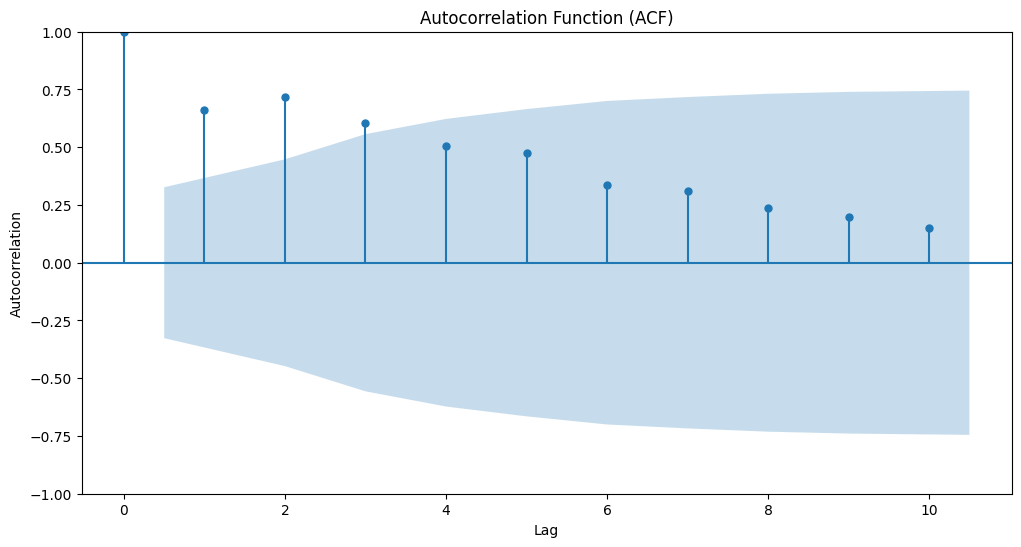

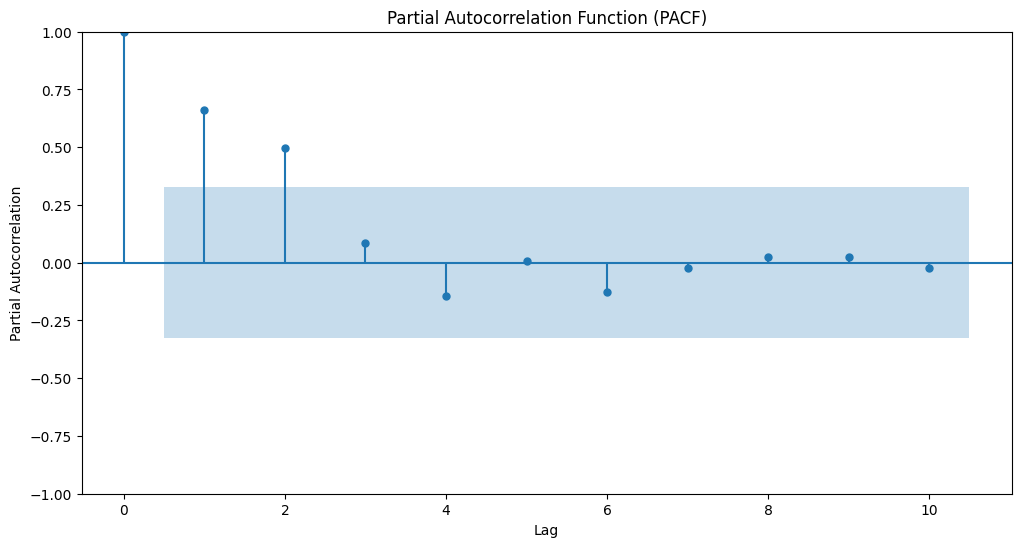

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data['Sales'], lags=10, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(data['Sales'], lags=10, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()

1. Autocorrelation Function (ACF):

The ACF plot shows the correlation between the sales data and its lagged values. Each bar in the ACF plot represents the correlation at a specific lag.


Positive autocorrelation: The bars in the ACF plot decay slowly and remain above the significance range, it indicates a positive autocorrelation. It suggests that there is a relationship between the current sales and past sales at those lags.
    
2. Partial Autocorrelation Function (PACF):

The PACF plot represents the partial correlation between the sales data and its lagged values, while controlling for the intermediate lags.
The PACF values indicate the direct effect of a specific lag on the current sales, eliminating the indirect effects mediated by the intermediate lags.


Significant PACF values: The bars in the PACF plot extends beyond the significance range, it indicates a significant partial autocorrelation. It suggests that the specific lag has a direct influence on the current sales, independent of the other lags. 